# Representing Dats and Feature Engineering

In [1]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp
print("scipy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

import matplotlib.pyplot as plt
from IPython import display
import mglearn

Python version: 3.7.0 (default, Aug 22 2018, 15:22:33) 
[Clang 9.1.0 (clang-902.0.39.2)]
pandas version: 0.23.4
matplotlib version: 2.2.3
numpy version: 1.15.1
scipy version: 1.1.0
IPython version: 6.5.0
scikit-learn version: 0.19.2


## * Categorical Features (Discrete Feature)

#### adult dataset to predict annual income

In [2]:
data = pd.read_csv('~/Desktop/Coding/ML/IntroToMLwithPython/data/adult.csv')
data.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
import os

data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"),
    header=None, index_col=False,
    names=['age', 'workclass', 'nflwgt', 'education', 'education-num', 'martial-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

# Choose some columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
data.head(10)

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
5,37,Private,Masters,Female,40,Exec-managerial,<=50K
6,49,Private,9th,Female,16,Other-service,<=50K
7,52,Self-emp-not-inc,HS-grad,Male,45,Exec-managerial,>50K
8,31,Private,Masters,Female,50,Prof-specialty,>50K
9,42,Private,Bachelors,Male,40,Exec-managerial,>50K


In [4]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


##### one-hot-encoding

* pandas에서 get_dummies 함수는 객체 타입(like String)이나 범주형을 가진 열을 자동으로 변환해줌

In [5]:
print("Original Features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original Features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [6]:
data_dummies.head(10)

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,37,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,49,16,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7,52,45,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,31,50,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9,42,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


* Extract every columns from age to occupation_ Transport-moving, which include feature

In [7]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract Numpy Array
x = features.values
y = data_dummies['income_ >50K'].values
print("x.shape: {}\ny.shape: {}".format(x.shape, y.shape))
features.head()

x.shape: (32561, 44)
y.shape: (32561,)


,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,38,40,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53,40,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print("Test Score: {:.2f}".format(logreg.score(x_test, y_test)))

Test Score: 0.81


#### * Categorical Features in Numbers

In [9]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만듦
demo_df = pd.DataFrame({'Number Feature': [0, 1, 2, 1], 'Categorical Feature': ['Socks', 'Fox', 'Socks', 'Box']})
demo_df

,Number Feature,Categorical Feature
0,0,Socks
1,1,Fox
2,2,Socks
3,1,Box


In [10]:
pd.get_dummies(demo_df)

,Number Feature,Categorical Feature_Box,Categorical Feature_Fox,Categorical Feature_Socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


* get_dummies 함수는 문자열 특성만 인코딩되며, 숫자 특성은 바뀌지 않음

In [11]:
demo_df['Number Feature'] = demo_df['Number Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Number Feature', 'Categorical Feature'])

,Number Feature_0,Number Feature_1,Number Feature_2,Categorical Feature_Box,Categorical Feature_Fox,Categorical Feature_Socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


* 숫자 특성도 가변수로 만들기 위해선, columns 매개변수에 인코딩하고 싶은 열 명시

## dd

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


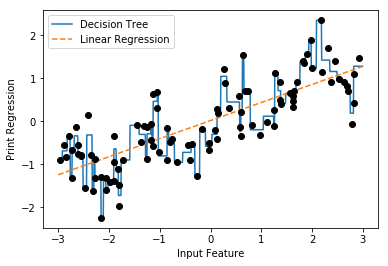

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

x, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(x, y)
plt.plot(line, reg.predict(line), label='Decision Tree')

reg = LinearRegression().fit(x, y)
plt.plot(line, reg.predict(line), '--', label="Linear Regression")

plt.plot(x[:, 0], y , 'o', c='k')
plt.ylabel("Print Regression")
plt.xlabel("Input Feature")
plt.legend(loc="best")

##### * Binning

In [15]:
bins = np.linspace(-3, 3, 11)
print("bin: {}".format(bins))

bin: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [16]:
which_bin = np.digitize(x, bins=bins)
print("\nData Point:\n", x[:5])
print("\n데이터 포인트의 소속 구간:\n", which_bin[:5])


Data Point:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


* wave 데이터셋에 있는 연속성 특성을 각 데이터 포인트가 어느 구간에 속했는지로 인코딩한 범주형 특성으로 변환
* 이 데이터에 scikit-learn 모델을 적용하기 위해 OneHotEncoder로 변환

In [19]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
# encoder.fit은 which_bin에 나타난 유일한 값을 찾는다.
encoder.fit(which_bin)

# one-hot-encoding으로 변환
x_binned = encoder.transform(which_bin)
print(x_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
print("x_binned.shape: {}".format(x_binned.shape))

x_binned.shape: (100, 10)


* one-hot-encoding된 데이터로 선형 회귀 모델과 결정 트리 모델을 만듦

Text(0.5,0,'Input Feature')

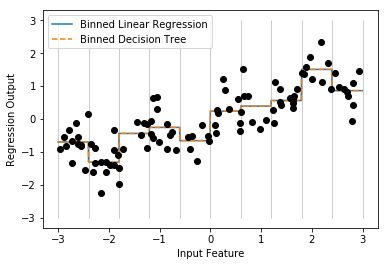

In [23]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(x_binned, y)
plt.plot(line, reg.predict(line_binned), label='Binned Linear Regression')

reg = DecisionTreeRegressor(min_samples_split=3).fit(x_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='Binned Decision Tree')
plt.plot(x[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")